# Conjunto de dados de doenças cardiovasculares

## Descrição dos dados

### Neste problema existem 3 tipos de dados:

Dados objetivos: Informações factuais;

Exame: resultados de exames médicos;

Subjetivo: informações fornecidas pelo paciente.


=============================================================================

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Característica objetiva | age | int (days) |
| Height | Característica objetiva | height | int (cm) |
| Weight | Característica objetiva | weight | float (kg) |
| Gender | Característica objetiva | gender | código categórico |
| Pressão arterial sistólica | Característica medida | ap_hi | int |
| Pressão sanguínea diastólica | Característica medida | ap_lo | int |
| Cholesterol | Característica medida | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Característica medida | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Característica Subjetiva | smoke | binary |
| Alcohol intake | Característica Subjetiva | alco | binary |
| Atividade física | Característica Subjetiva | active | binary |


=============================================================================

Variável de saída

| Presença ou ausência de doença cardiovascular | Variável de saída | cardio | binário|

## Algumas hipóteses iniciais

### Pessoas acima de 100kg tem mais change de ter problema cardíaco?
### Existe relação da doença cardíaca com o IMC?
### Pessoas que praticam atividade física são menos propensas a ter problemas cardíacos ou existem outros fatores com maior peso como fumar e beber?

In [615]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [616]:
treino = pd.read_csv('cardio_train.csv', sep=';')

In [617]:
treino.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [618]:
treino.shape

(70000, 13)

In [619]:
# Não exitem valores nulos
treino.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Adicionando coluna IMC - O IMC é o Índice de Massa Corporal é uma medida internacional usada para calcular se uma pessoa está no peso ideal. 

Magreza, quando o resultado é menor que 18,5 kg/m2;

Normal, quando o resultado está entre 18,5 e 24,9 kg/m2;

Sobrepeso, quando o resultado está entre 24,9 e 30 kg/m2;

Obesidade, quando o resultado é maior que 30 kg/m2.

In [620]:
treino['IMC'] = round(treino['weight']/(treino['height']/100)**2, 2)

In [621]:
treino['classe'] = treino['IMC'].apply(lambda x: 'Magreza' if x < 17 else('Abaixo do peso' if 17 <= x <= 18.49 else( 'Normal' if 18.5 <= x <= 24.99 else('Acima do peso' if 25 <= x <= 29.99 else('Obesidade 1' if 30 <= x <= 34.99 else('Obesidade 2' if 35 <= x <= 39.99 else 'Obesidade 3'))))))

In [622]:
treino['classe'].value_counts()

Normal            25656
Acima do peso     25175
Obesidade 1       12242
Obesidade 2        4397
Obesidade 3        1886
Abaixo do peso      472
Magreza             172
Name: classe, dtype: int64

In [623]:
# Tranformando idade para anos

treino['age'] = round(treino['age']/365,1)

In [624]:
treino

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,classe
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Normal
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Obesidade 1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Normal
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Acima do peso
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.01,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.93,Acima do peso
69996,99995,61.9,1,158,126.0,140,90,2,2,0,0,1,1,50.47,Obesidade 3
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.35,Obesidade 1
69998,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.10,Acima do peso


## Classificando indivíduos por faiza etária

Até 10 anos - Criança

Entre 10 e 18 - Adolescente

De 18 até 40 - Adulto 1

De 40 até 60 - Adulto 2

Acima de 60 - Idoso


In [625]:
treino['faixa_etaria'] = treino['age'].apply(lambda x: 'Crianca' if x < 10 else('Adolescente' if 10 <= x <= 17.99 else( 'Adulto 1' if 18 <= x <= 39.99 else('Adulto 2' if 40 <= x <= 59.99 else('Idoso')))))

In [626]:
treino

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,classe,faixa_etaria
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Normal,Adulto 2
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Obesidade 1,Adulto 2
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Normal,Adulto 2
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Acima do peso,Adulto 2
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0,23.01,Normal,Adulto 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.7,2,168,76.0,120,80,1,1,1,0,1,0,26.93,Acima do peso,Adulto 2
69996,99995,61.9,1,158,126.0,140,90,2,2,0,0,1,1,50.47,Obesidade 3,Idoso
69997,99996,52.2,2,183,105.0,180,90,3,1,0,1,0,1,31.35,Obesidade 1,Adulto 2
69998,99998,61.5,1,163,72.0,135,80,1,2,0,0,0,1,27.10,Acima do peso,Idoso


In [627]:
def histplot(x, titulo=None, x_texto=None, y_texto=None, cor=None, grade=False):

  plt.style.use("ggplot")
  #plt.figure(figsize = (14, 10))
  sns.histplot(x = x, edgecolor='black', alpha=0.3, kde=1, color=cor)
  plt.axvline(x=x.mean(), color='red', linestyle='solid', linewidth=2, label="Média")
  plt.axvline(x=x.median(), color='green', linestyle='solid', linewidth=2, label="Mediana")
  plt.axvline(x=x.value_counts().index[0], color='yellow', linestyle='solid', linewidth=2, label="Moda")
  plt.title(titulo, fontsize=16)
  plt.grid(grade)
  plt.xlabel(x_texto, fontsize=14)
  plt.ylabel(y_texto, fontsize=14)
  plt.legend()
  #plt.show()

In [628]:
def boxplot(df,x,y,x_texto=None,y_texto=None,titulo=None, x_lim=None, y_lim=None):

  plt.style.use("ggplot")  
  ax = sns.boxplot(x=x, y=y, data=df)
  ax.set_xlabel(x_texto, fontsize=16)
  ax.set_ylabel(y_texto, fontsize=16)
  ax.set_xlim(x_lim)
  ax.set_ylim(y_lim)
  plt.title(titulo, fontsize=18)

## Distribuição das alturas dos indivíduos do dataset

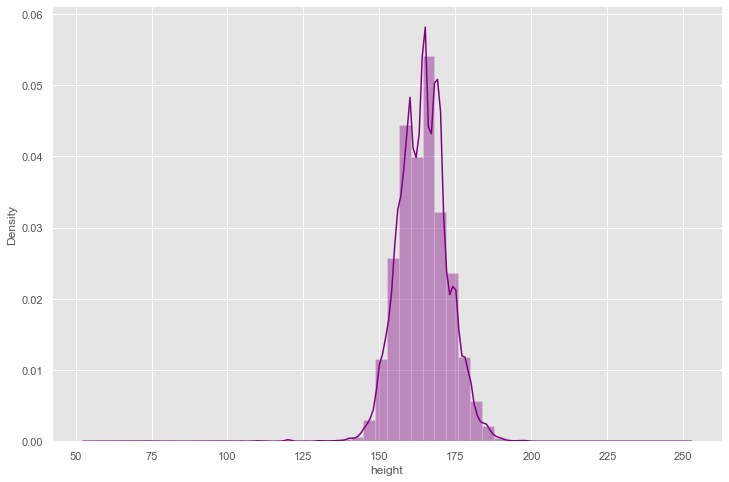

In [629]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.distplot(treino['height'], color="purple")
plt.show()

## Distribuição do peso dos indivíduos do dataset

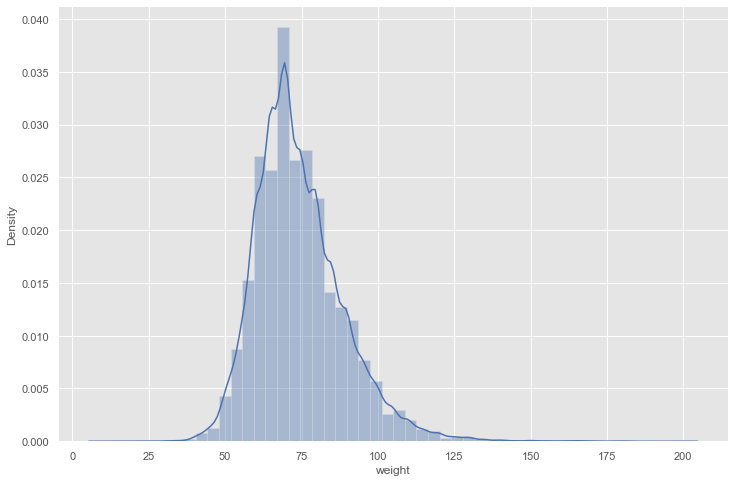

In [630]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.distplot(treino['weight'], color="b")
plt.show()

## Distribuição do IMC dos indivíduos do dataset

In [631]:
treino['IMC'].describe()

count    70000.000000
mean        27.556545
std          6.091405
min          3.470000
25%         23.880000
50%         26.375000
75%         30.220000
max        298.670000
Name: IMC, dtype: float64

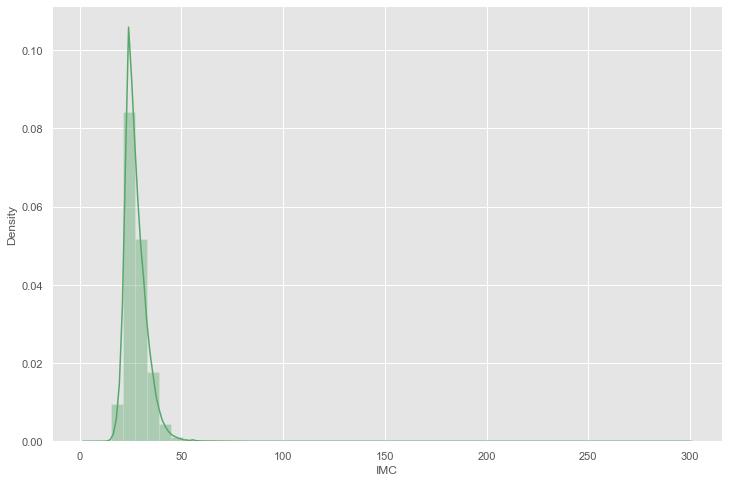

In [632]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.distplot(treino['IMC'], color="g")
plt.show()

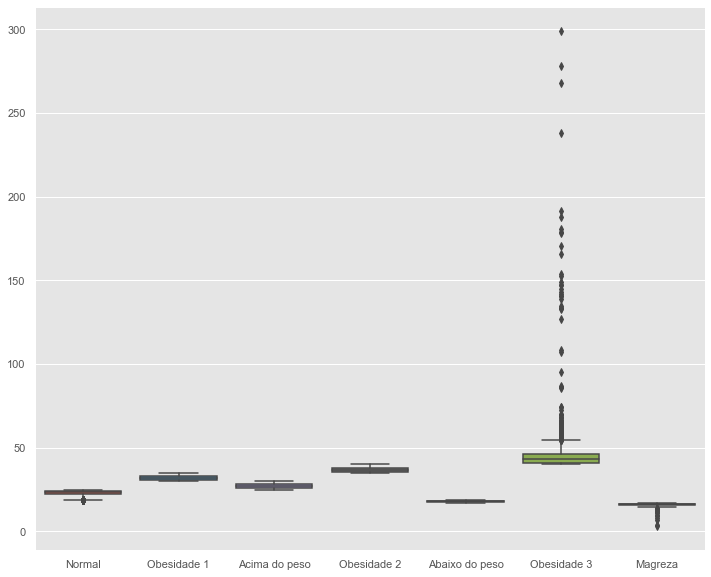

In [633]:
plt.figure(figsize=(12,10))
plt.style.use("ggplot")
boxplot(df=treino, x='classe', y='IMC')
plt.show()

## Considerando indivíduos com IMC até 60 kg/m2

Observou-se muito outliers na conjunto de indivíduos com obesidade 3. A medida que diminuimos esses outliers filtrando o limite do IMC, neste caso 60kg/m2, verificamos que a distribuição se aproxima de uma distribuição normal ou levemente assimétrica a positiva

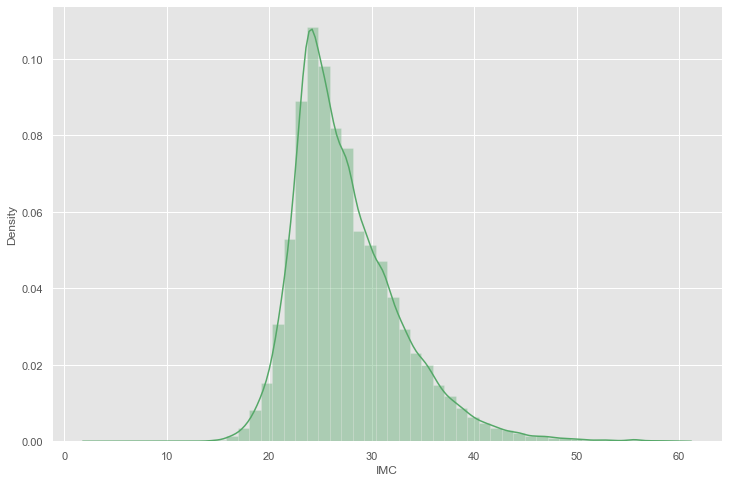

In [634]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.distplot(treino.query('IMC < 60')['IMC'], color="g")
plt.show()

## Verificando impacto da atividade física - Variável Active

In [635]:
total = treino[treino['cardio']==1]['active'].value_counts()
porcentagem_ativos = pd.DataFrame(round(total/treino[treino['cardio']==1]['active'].value_counts().sum()*100, 2)).rename(columns={'active': 'Porcentagem (%)'})

In [636]:
print('Porcentagem de cardíacos quanto a praticarem ou não atividade física')
porcentagem_ativos

Porcentagem de cardíacos quanto a praticarem ou não atividade física


,Porcentagem (%)
1,78.96
0,21.04


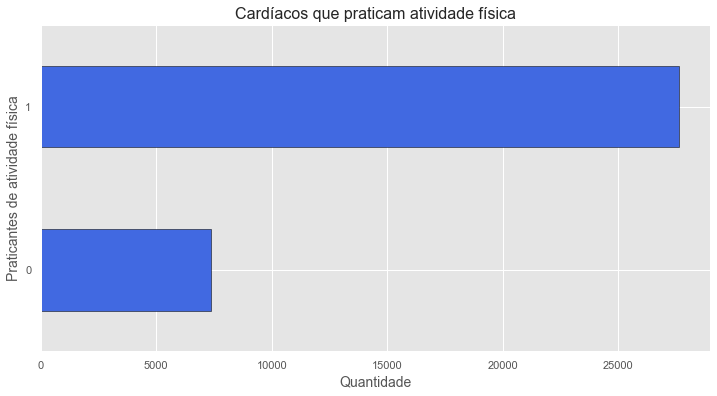

In [637]:
cardiacos_ativos = treino[treino['cardio']==1].groupby('active').count()
plt.figure(figsize=(12,6))
plt.style.use("ggplot")  
cardiacos_ativos['cardio'].sort_values(ascending=True).plot(kind='barh', color='royalblue', edgecolor='black')
plt.title('Cardíacos que praticam atividade física', fontsize=16)
plt.ylabel('Praticantes de atividade física', fontsize=14)
plt.xlabel('Quantidade', fontsize=14)
plt.show()

In [638]:
total = cardiacos_ativos['cardio'][0]+cardiacos_ativos['cardio'][1]
porcentagem_card_ativos = round((cardiacos_ativos['cardio'][1]/total)*100,2)
porcentagem_card_nao_atv = round((cardiacos_ativos['cardio'][0]/total)*100,2)


print('Porcentagem de pessoas que praticam atividade física e são cardíacos: {}%'.format(porcentagem_card_ativos))
print('Porcentagem de pessoas que praticam atividade física e são cardíacos: {}%'.format(porcentagem_card_nao_atv))

Porcentagem de pessoas que praticam atividade física e são cardíacos: 78.96%
Porcentagem de pessoas que praticam atividade física e são cardíacos: 21.04%


## Verificando impacto da idade - Variável age

## Nota-se que a partir dos quarenta 40 a chance de doença cardiaca é maior

In [639]:
total_faixa = treino[treino['cardio']==1]['faixa_etaria'].value_counts()
porcentagem_faixa_etaria = pd.DataFrame(round(total_faixa/treino[treino['cardio']==1]['faixa_etaria'].value_counts().sum()*100, 2)).rename(columns={'faixa_etaria': 'Porcentagem (%)'})

In [640]:
print('Porcentagem de cardíacos de acordo com a faixa etária')
porcentagem_faixa_etaria

Porcentagem de cardíacos de acordo com a faixa etária


,Porcentagem (%)
Adulto 2,73.20
Idoso,25.66
Adulto 1,1.13


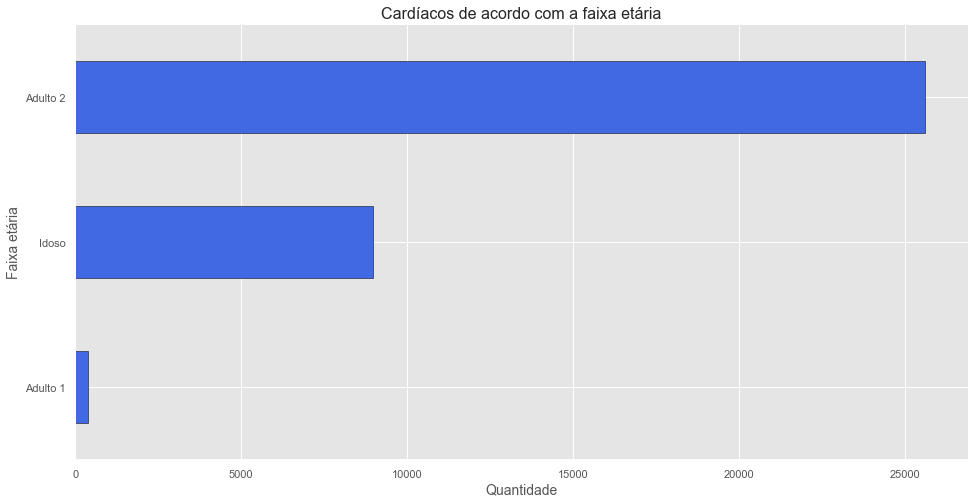

In [641]:
cardiacos_faixa = treino[treino['cardio']==1].groupby('faixa_etaria').count()
plt.figure(figsize=(16,8))
plt.style.use("ggplot")  
cardiacos_faixa['cardio'].sort_values(ascending=True).plot(kind='barh', color='royalblue', edgecolor='black')
plt.title('Cardíacos de acordo com a faixa etária', fontsize=16)
plt.ylabel('Faixa etária', fontsize=14)
plt.xlabel('Quantidade', fontsize=14)
plt.show()

In [642]:
total_classe = treino[treino['cardio']==1]['classe'].value_counts()
porcentagem = pd.DataFrame(round(total_classe/treino[treino['cardio']==1]['classe'].value_counts().sum()*100, 2)).rename(columns={'classe': 'Porcentagem (%)'})

In [643]:
print('Porcentagem de cardíacos de acordo com a classe de peso')
porcentagem

Porcentagem de cardíacos de acordo com a classe de peso


,Porcentagem (%)
Acima do peso,36.70
Normal,29.39
Obesidade 1,21.14
Obesidade 2,8.53
Obesidade 3,3.71
Abaixo do peso,0.38
Magreza,0.14


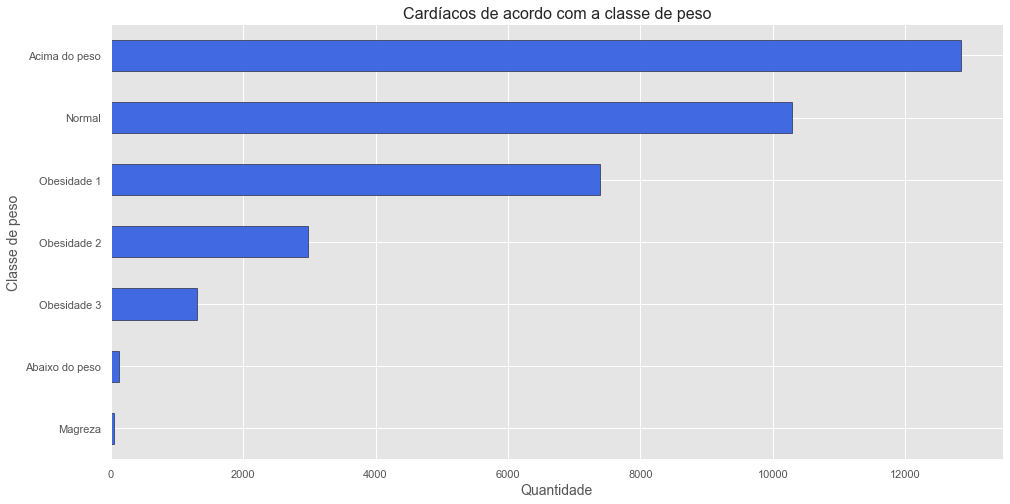

In [644]:
cardiacos_classe = treino[treino['cardio']==1].groupby('classe').count()
plt.figure(figsize=(16,8))
plt.style.use("ggplot")  
cardiacos_classe['cardio'].sort_values(ascending=True).plot(kind='barh', color='royalblue', edgecolor='black')
plt.title('Cardíacos de acordo com a classe de peso', fontsize=16)
plt.xlabel('Quantidade', fontsize=14)
plt.ylabel('Classe de peso', fontsize=14)
plt.show()

### Cholesterol

In [645]:
total_chol = treino[treino['cardio']==1]['cholesterol'].value_counts()
porcentagem = pd.DataFrame(round(total_chol/treino[treino['cardio']==1]['classe'].value_counts().sum()*100, 2)).rename(columns={'cholesterol': 'Porcentagem (%)'})

In [646]:
print('Porcentagem de cardíacos de com o nível de colesterol')
porcentagem

Porcentagem de cardíacos de com o nível de colesterol


,Porcentagem (%)
1,65.91
3,17.65
2,16.44


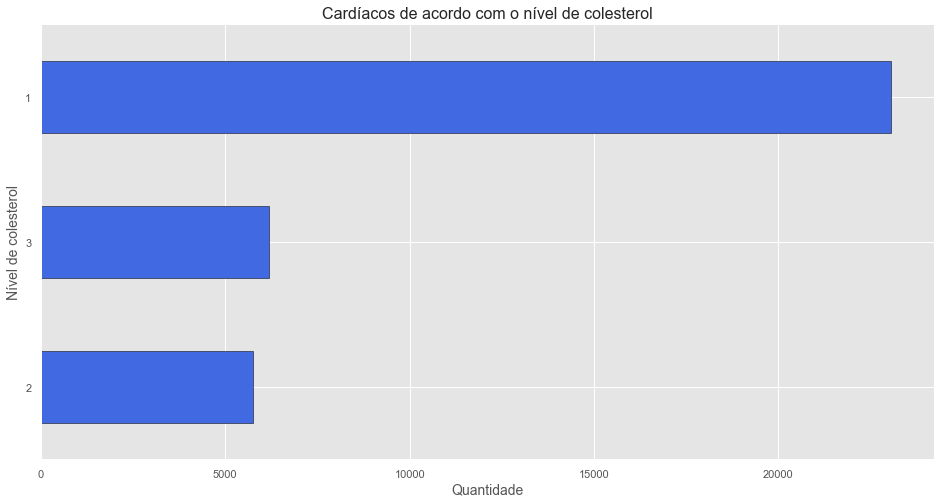

In [647]:
cardiacos_chol = treino[treino['cardio']==1].groupby('cholesterol').count()
plt.figure(figsize=(16,8))
plt.style.use("ggplot")  
cardiacos_chol['cardio'].sort_values(ascending=True).plot(kind='barh', color='royalblue', edgecolor='black')
plt.title('Cardíacos de acordo com o nível de colesterol', fontsize=16)
plt.ylabel('Nível de colesterol', fontsize=14)
plt.xlabel('Quantidade', fontsize=14)
plt.show()

## Alcohol

In [670]:
total_alco = treino[treino['cardio']==1]['alco'].value_counts()
porcentagem = pd.DataFrame(round(total_alco/treino[treino['cardio']==1]['classe'].value_counts().sum()*100, 2)).rename(columns={'alco': 'Porcentagem (%)'})

In [671]:
print('Porcentagem de cardíacos de acordo com o consumo de álcool')
porcentagem

Porcentagem de cardíacos de acordo com o consumo de álcool


,Porcentagem (%)
0,94.79
1,5.21


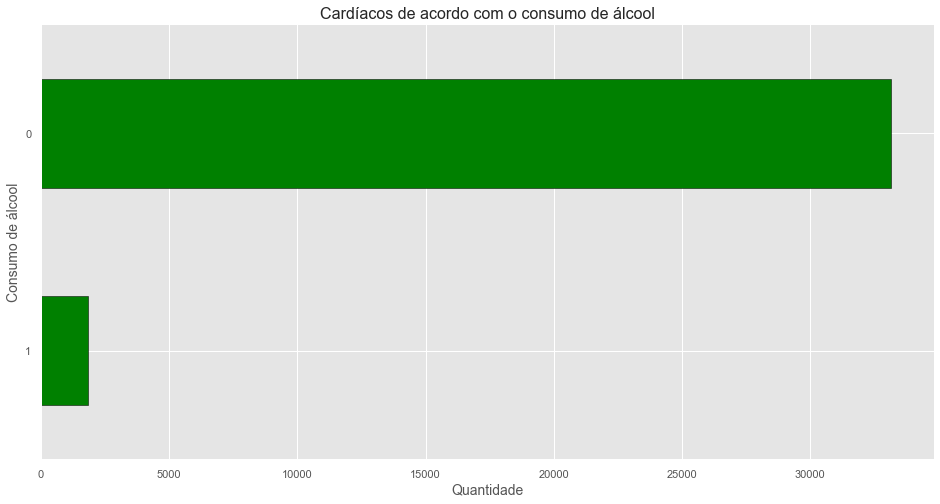

In [673]:
cardiacos_alco = treino[treino['cardio']==1].groupby('alco').count()
plt.figure(figsize=(16,8))
plt.style.use("ggplot")  
cardiacos_alco['cardio'].sort_values(ascending=True).plot(kind='barh', color='green', edgecolor='black')
plt.title('Cardíacos de acordo com o consumo de álcool', fontsize=16)
plt.ylabel('Consumo de álcool', fontsize=14)
plt.xlabel('Quantidade', fontsize=14)
plt.show()

## Smoke

In [674]:
total_smoke = treino[treino['cardio']==1]['smoke'].value_counts()
porcentagem = pd.DataFrame(round(total_smoke/treino[treino['cardio']==1]['classe'].value_counts().sum()*100, 2)).rename(columns={'smoke': 'Porcentagem (%)'})

In [676]:
print('Porcentagem de cardíacos de acordo com o uso de cigarro')
porcentagem

Porcentagem de cardíacos de acordo com o uso de cigarro


,Porcentagem (%)
0,91.63
1,8.37


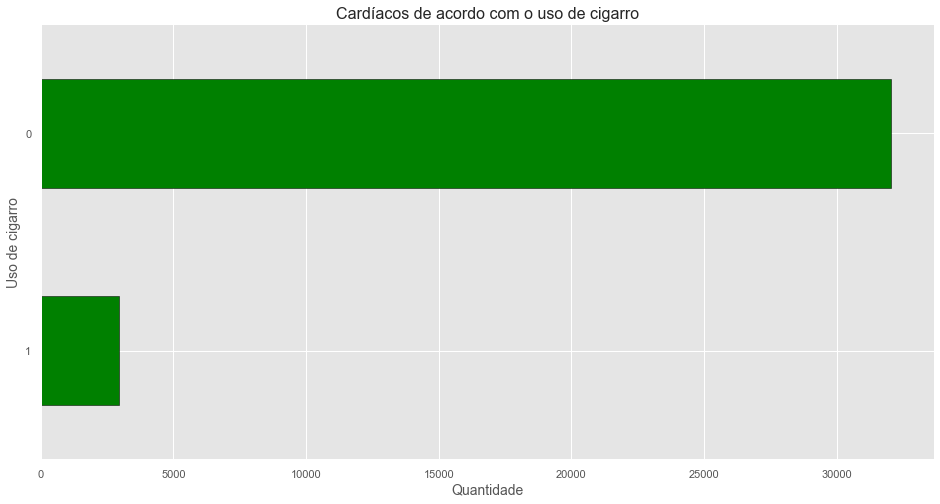

In [677]:
cardiacos_smoke = treino[treino['cardio']==1].groupby('smoke').count()
plt.figure(figsize=(16,8))
plt.style.use("ggplot")  
cardiacos_smoke['cardio'].sort_values(ascending=True).plot(kind='barh', color='green', edgecolor='black')
plt.title('Cardíacos de acordo com o uso de cigarro', fontsize=16)
plt.ylabel('Uso de cigarro', fontsize=14)
plt.xlabel('Quantidade', fontsize=14)
plt.show()

# Análise da pressão arterial
## - Pressão sistólica
#### Em adultos, a pressão sistólica pode ficar entre 90 e 120 mmHg e a diastólica pode variar entre 60 e 80 mmHg.

In [648]:
card_indiv = ['cardio','ap_hi', 'ap_lo']
pressao = treino.filter(items=card_indiv)

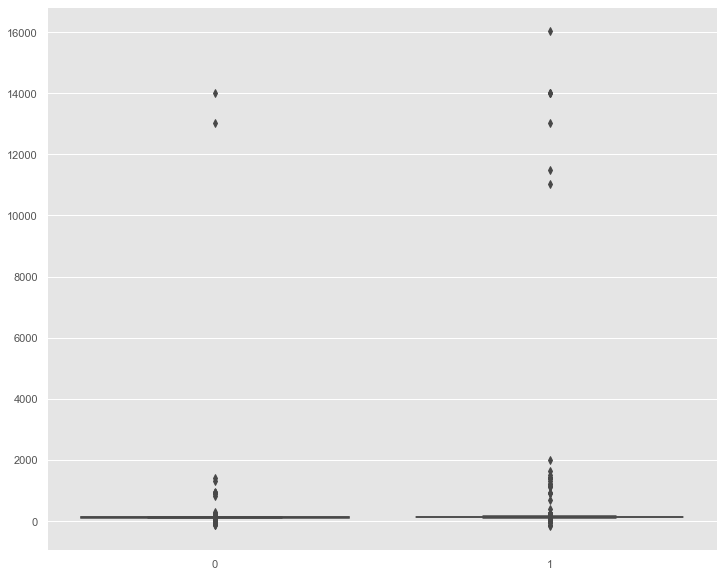

In [649]:
plt.figure(figsize=(12,10))
plt.style.use("ggplot")
boxplot(df=treino, x=pressao['cardio'], y=pressao['ap_hi'])
plt.show()

In [650]:
treino['ap_hi'].describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

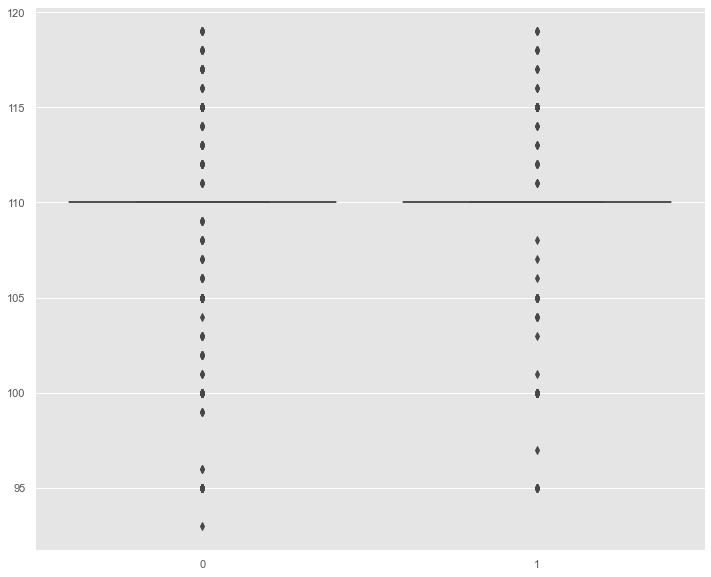

In [651]:
plt.figure(figsize=(12,10))
plt.style.use("ggplot")
boxplot(df=treino, x=pressao['cardio'], y=pressao.query('90<ap_hi<120')['ap_hi'])
plt.show()

### Filtrando pressão sistólica entre 0 e 500 mmHg para facilitar a visualização do gráfico. Existe valores muito altos e muitos baixos de parte dos indivíduos. Vale lembrar, que o normal é entre 90 e 120 mmHg

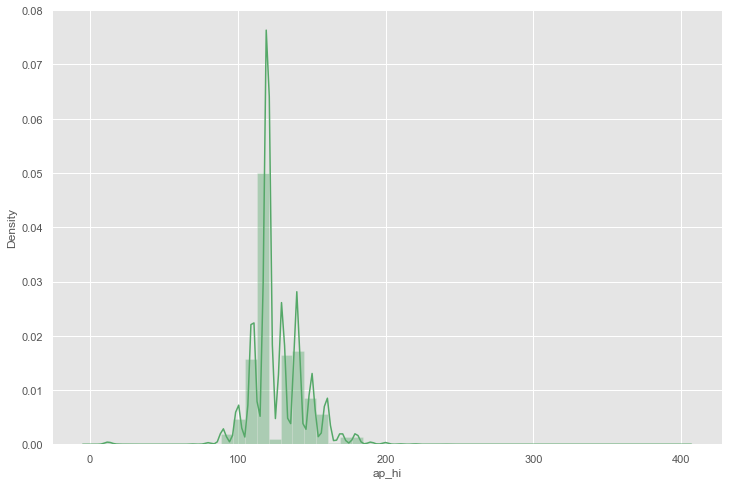

In [652]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.distplot(pressao.query('0<ap_hi<500')['ap_hi'], color="g")
plt.show()

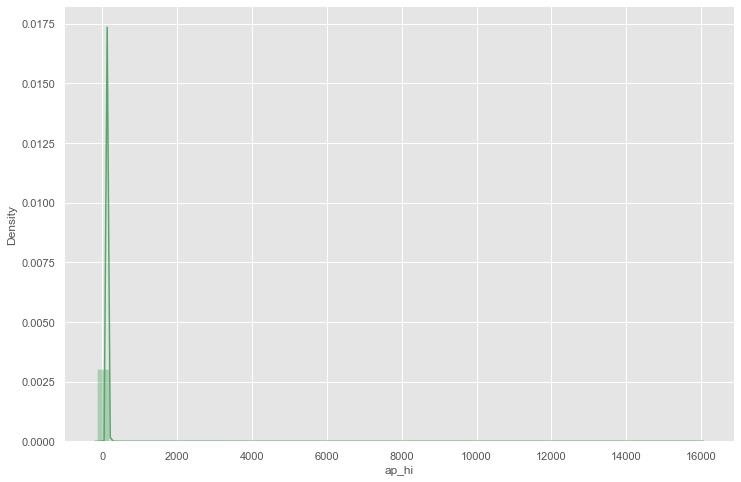

In [653]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.distplot(pressao['ap_hi'], color="g")
plt.show()

In [654]:
pressao_log = np.log1p(pressao['ap_hi'])

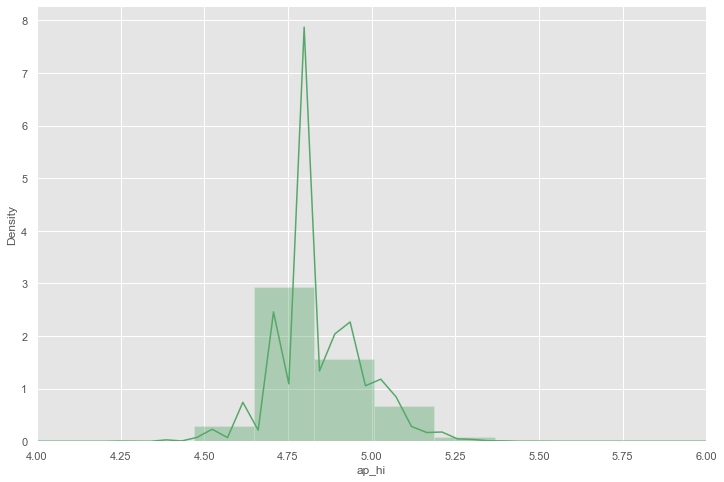

In [655]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.distplot(pressao_log, color="g")
plt.xlim(4,6)
plt.show()

In [656]:
pessoas_pressao_anormal = pressao.shape[0] - pressao.query('90 < ap_hi < 120').shape[0]
porcentagem_pessoas_pressao_anormal = round(pessoas_pressao_anormal/pressao.shape[0], 2)*100
print('A porcentagem de indivíduos que estão com a pressão sistólica anormal é {}%'.format(porcentagem_pessoas_pressao_anormal))

A porcentagem de indivíduos que estão com a pressão sistólica anormal é 83.0%


## - Pressão diastólica
#### A pressão diastólica pode variar entre 60 e 80 mmHg.

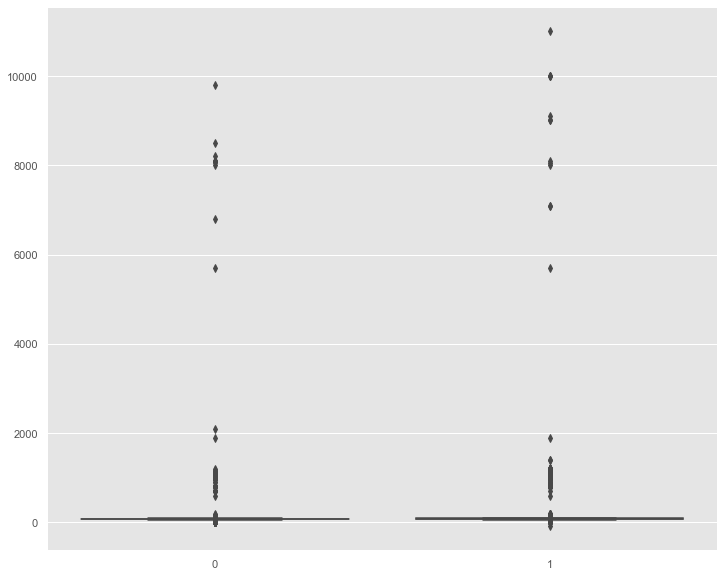

In [657]:
plt.figure(figsize=(12,10))
plt.style.use("ggplot")
boxplot(df=treino, x=pressao['cardio'], y=pressao['ap_lo'])
plt.show()

In [658]:
treino['ap_lo'].describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [659]:
pessoas_pressao_anormal_di = pressao.shape[0] - pressao.query('60 < ap_hi < 80').shape[0]
pessoas_pressao_anormal_di = round(pessoas_pressao_anormal_di/pressao.shape[0], 4)*100
print('A porcentagem de indivíduos que estão com a pressão diastólica anormal é {}%'.format(pessoas_pressao_anormal_di))

A porcentagem de indivíduos que estão com a pressão diastólica anormal é 99.97%


## Correlação

### As variáveis numéricas com maior correlação com a variável de saída cardio foram

- Age: 0.24
- Cholesterol: 0.22
- Weight: 0.18
- IMC: 0.17

In [660]:
## Verificando número de variáveis numéricas

variaveis_numericas = treino.select_dtypes(include = [np.number])
print("O número de variáveis numéricas é: {}".format(variaveis_numericas.shape[1]))

O número de variáveis numéricas é: 14


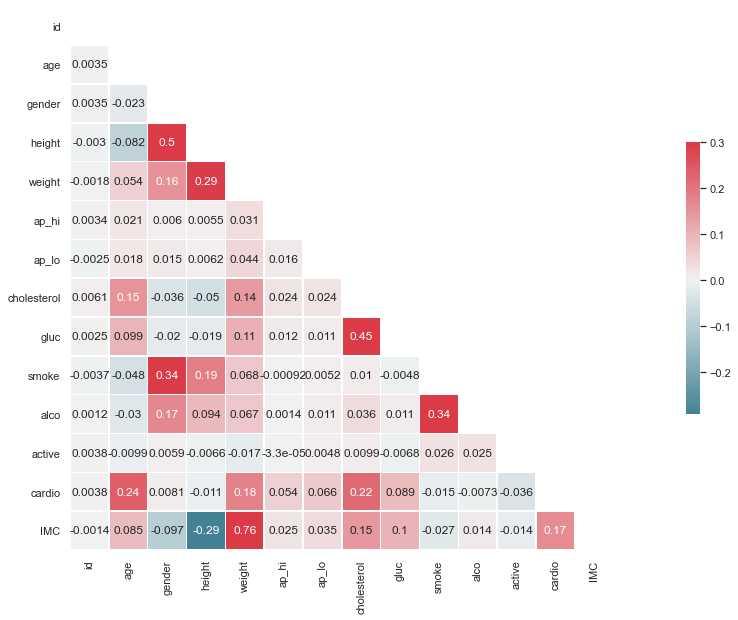

In [661]:
corr = variaveis_numericas.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(26, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Correlações maiores que 0.1

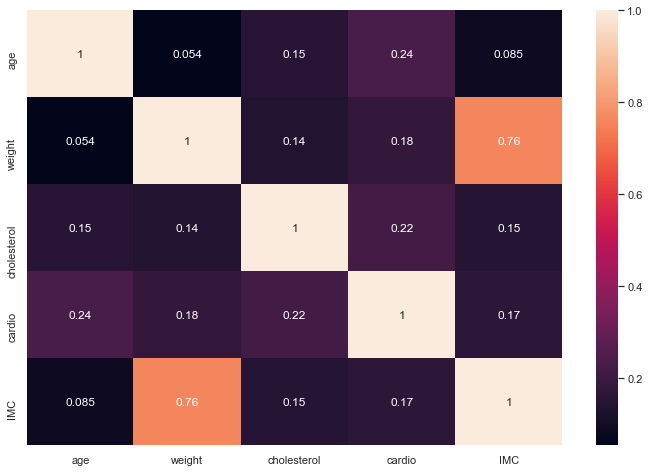

In [662]:
top_feature = corr.index[corr['cardio']>0.1]
plt.subplots(figsize=(12,8))
top_corr = treino[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

# Feature Selection

## Boruta

In [663]:
## Verificando número de variáveis categóricas

variaveis_categoricas = treino.select_dtypes(exclude = [np.number])
print("O número de variáveis numéricas é: {}".format(variaveis_categoricas.shape[1]))

O número de variáveis numéricas é: 2


In [664]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

treino['classe'] = label_encoder.fit_transform(treino['classe'])
treino['faixa_etaria'] = label_encoder.fit_transform(treino['faixa_etaria'])

In [665]:
y = treino['cardio']
X = treino.drop('cardio', axis=1)

In [666]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

###initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['id', 'age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'IMC']
features in the blue area: ['active']


### As variáveis gender, height, smoke, alco, faixa_etaria e classe foram descartadas
### Lembrando que as variáveis faixa_etaria e classe foram criadas posteriormente (Feature engineering) utilizando as várias age, weight e height respectivamente

## Permutation importance

In [680]:
y = treino['cardio']
x= treino.drop('cardio', axis=1)

In [681]:
from sklearn.model_selection import train_test_split

x_train, x_val,y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=72)

In [682]:
model = RandomForestRegressor(random_state=1)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [684]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(x_val, y_val)
eli5.show_weights(perm, feature_names = x_val.columns.tolist())

Weight,Feature
0.2965 ± 0.0195,ap_hi
0.0668 ± 0.0026,cholesterol
0.0577 ± 0.0068,age
0.0124 ± 0.0029,ap_lo
0.0040 ± 0.0016,gluc
0.0039 ± 0.0045,IMC
0.0037 ± 0.0026,active
0.0022 ± 0.0013,weight
0.0012 ± 0.0010,gender
0.0008 ± 0.0007,smoke


### O primeiro número em cada linha mostra a redução no desempenho do modelo pela reshuffle desse recurso.
### O segundo número é uma medida da aleatoriedade da redução de desempenho para diferentes reshuffles da coluna de recursos.

### Baseado nos dois métodos de escolha de variáveis Boruta e Permutation importance, as variáveis escolhidas para continuarem no dataset são:

- id
- age
- weight
- ap_hi
- ap_lo
- cholesterol
- gluc
- IMC
